# Лабораторная 3. Линейная регрессия

- Выбор датасетов:
  - датасет о жилье в Калифорнии - https://www.kaggle.com/datasets/camnugent/california-housing-prices

- Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [ ]:
import csv
import numpy as np
import pandas as pd
from random import shuffle

with open("california_housing_train.csv") as f:
    data = list(csv.reader(f))

# convert to float
for i in range(1, len(data)):
    data[i] = np.array(list(map(float, data[i])))

df = pd.DataFrame(data[1:6], columns=data[0])
display(df)

headers = data[0]
data = data[1:]
shuffle(data)

data = np.transpose(data);


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Количество строк:

In [59]:
count = len(data[1])
print(count)

17000


Средние значения:

In [60]:
average = [sum(column)/count for column in data]
pd.DataFrame([average], columns=headers)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353


Максимальные и минимальные значения

In [61]:
minValues = [min(column) for column in data]
maxValues = [max(column) for column in data]
            
pd.DataFrame([minValues, maxValues], columns=headers, index=["min", "max"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0
max,-114.31,41.95,52.0,37937.0,6445.0,35682.0,6082.0,15.0001,500001.0


Среднеквадратические отклонения:

In [62]:
sd = []
for i in range(len(data)):
    column = data[i]
    avg = average[i]
    variance = sum((el - avg)**2 for el in column) / count # Дисперсия
    sd.append(variance**0.5)
    
pd.DataFrame([sd], columns=headers)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.005107,2.137277,12.586567,2179.882954,421.487054,1147.819198,384.509531,1.9081,115980.35305


Визуализация значений:

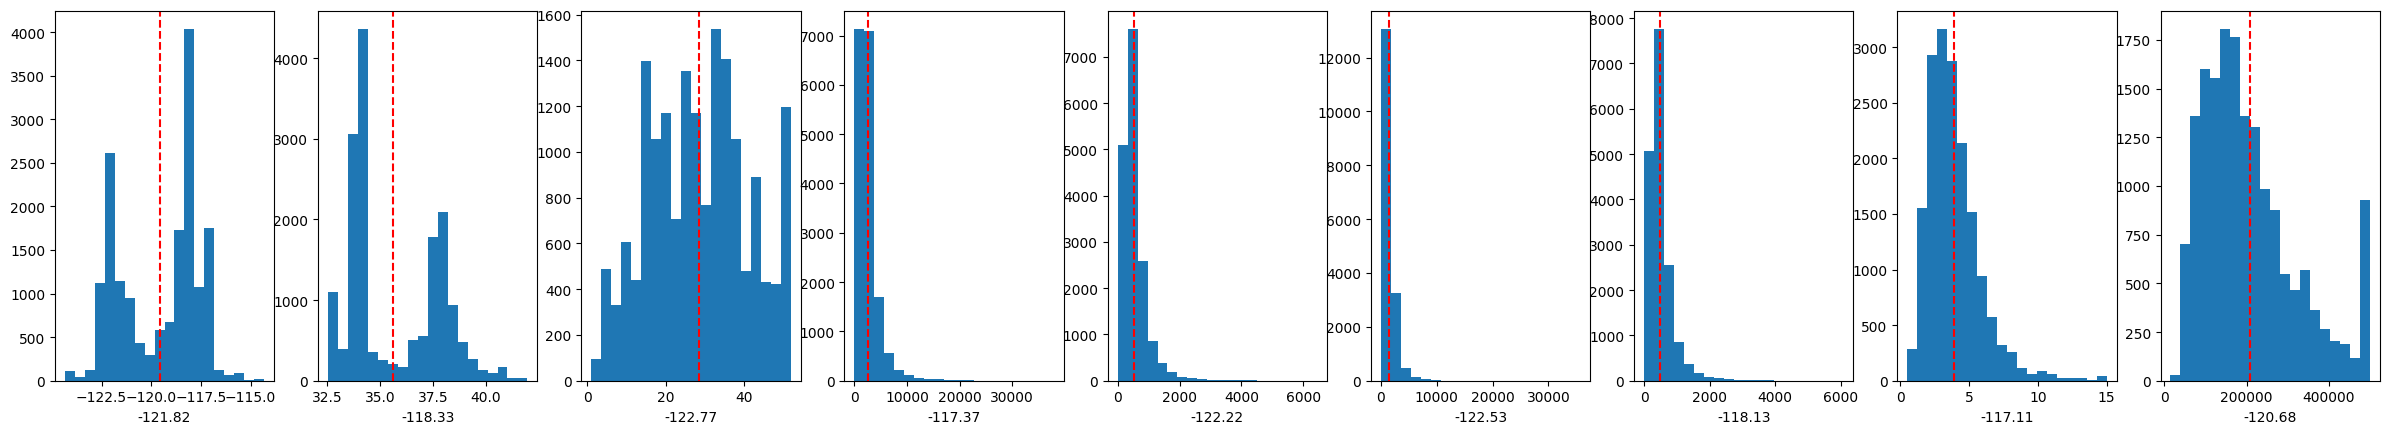

In [75]:
import matplotlib.pyplot as plt

plt.figure().set_figwidth(30)

for i in range(9):
    plt.subplot(1,9,i+1) 
    plt.hist(data[i], bins=20)
    plt.axvline(average[i], color='red', linestyle='dashed')
    plt.xlabel(data[0][i])

plt.show()

In [64]:
# todo: различные квантили

- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
  - Пропусков данных в файле нет
  - Кодирование категориальных признаков не требуется, так как все данные уже числовые
  - проведем min/max scaling (приведя все значения в диапазон от 0 до 1). Это нужно для того, чтобы разные данные в равной степени влияли на обучение модели

Min/max scaling: 
$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

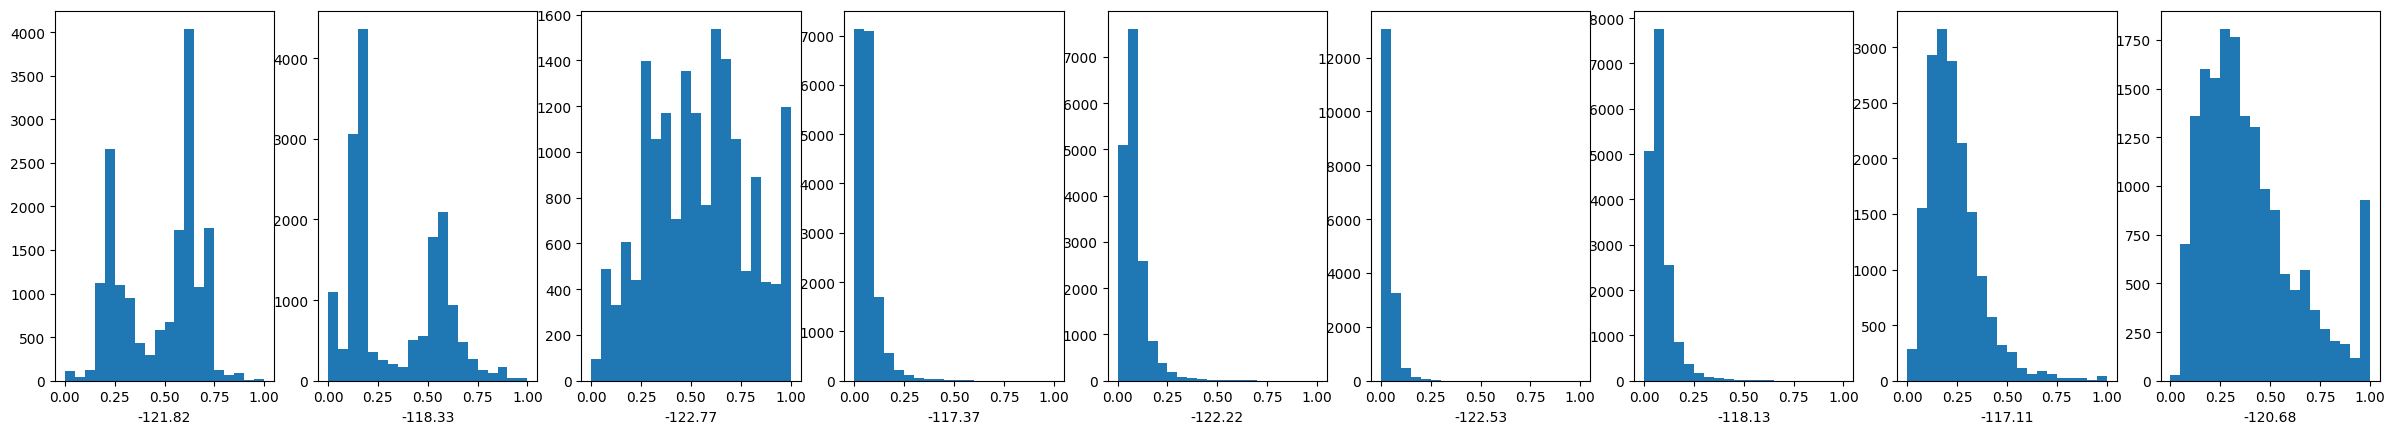

In [76]:
enhancedData = [[99] * count for _ in range(len(data))] 

for i in range(len(data)):
    column = data[i]
    minVal = minValues[i]
    maxVal = maxValues[i]
    for j in range(len(data[i])):
        enhancedData[i][j] = (data[i][j] - minVal) / (maxVal - minVal)

plt.figure().set_figwidth(30)

for i in range(9):
    plt.subplot(1,9,i+1) 
    plt.hist(enhancedData[i], bins=20)
    plt.xlabel(data[0][i])
    
plt.show()

- Разделите данные на обучающий и тестовый наборы данных.
  - разделим в отношении 70 на 30

In [77]:
testData = [column[:int(count*0.3)] for column in enhancedData]
learnData = [column[int(count*0.3):] for column in enhancedData]

- Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas. Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [78]:
# X - матрица значений независимых переменных (матрица признаков)
# Y - матрица значений зависимой переменной
# return - массив вида [a, b1, b2, ... , bn], где n - число независимых переменных
def getModel(X, Y):
    Y = np.array(Y)
    X = np.array(X)
    X = np.hstack(([[1]]*len(X), X)) # add column of ones
    Xt = X.transpose() 
    XtX = np.matmul(Xt, X)
    XtX_inv = np.linalg.inv(XtX)
    B = np.matmul(np.matmul(XtX_inv, Xt), Y)
    return B


данная функция вычисляет коэффициенты модели `[a, b1, b2, ... , bn]` по следующей формуле:
$$ B = (X^TX)^{-1}X^TY $$

- Постройте три модели с различными наборами признаков.

In [68]:
for i in range(len(headers)):
    print(f"{i} - {headers[i]}")

0 - longitude
1 - latitude
2 - housing_median_age
3 - total_rooms
4 - total_bedrooms
5 - population
6 - households
7 - median_income
8 - median_house_value


Построим модели с такими зависимостями:
1) `median_house_value от (longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income)`
2) `median_income от (housing_median_age, total_rooms, total_bedrooms, population, households)`  // todo:
3) `median_income от (housing_median_age, total_rooms, total_bedrooms, population, households)`  // todo:

In [79]:
# Model 1
learnDataModel_1 = np.transpose(learnData[0:8]) # берем нужные столбцы
parameters_1 = ['a'] + headers[0:8]

model_1 = getModel(learnDataModel_1, learnData[8])
# print(len(learnDataModel_1))
# print(len(learnDataRot[8]))

pd.DataFrame(model_1, index=parameters_1)

,0
a,0.715328
longitude,-0.877060
latitude,-0.819442
housing_median_age,0.118567
total_rooms,-0.715330
total_bedrooms,1.593768
population,-2.526681
households,0.438250
median_income,1.220096


- Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным

Коэффициент детерминации:
$$ R^2= 1-\frac{RSS}{TSS} $$
Где:
- RSS - сумма квадратов ошибок (ошибка - разница истинных и предсказанных значений)
- TSS - общая сумма квадратов (отклонений истинных значений от среднего значения)
$$ RSS=\sum_{i=1}^n(\hat{y_i}-y_i)^2 $$
$$ TSS=\sum_{i=1}^n(\bar{y}-y_i)^2 $$
Смысл:
- $R^2=1$ означает, что модель идеально объясняет данные.
- $R^2=0$ означает, что модель не объясняет данные лучше, чем простое среднее значение.
- $0<R^2<1$ - означает, что модель частично объясняет вариативность данных.
- $R^2<0$ - означает, что модель предсказывает хуже, чем простое среднее значение

In [70]:
def computeModelValue(model, data):
    value = model[0]
    for i in range(1,len(model)):
        value += model[i] * data[i-1]
    return value


In [80]:
# Model 1
testDataModel_1 = np.transpose(testData[0:8]) # берем нужные столбцы
realValuesModel_1 = testData[8]

rss = 0
tss = 0
avgValue = sum(realValuesModel_1) / len(realValuesModel_1)
for i in range(len(testDataModel_1)):
    value = computeModelValue(model_1, testDataModel_1[i])
    rss += (value - realValuesModel_1[i])**2
    tss += (value - avgValue)**2
    
print(f"R^2 = {1-(rss/tss)}")

R^2 = 0.4437700075464214
